# Assignment04 : Implement k-means algorithms for MNIST

# Name : Eun-Mi Joo
# Student ID : 20155714
# GitHub Link : https://github.com/joo228/assignment.git

# import package for plot and data management and max interger

In [165]:
import matplotlib.pyplot as plt
import numpy as np
import sys

# read MNIST file

In [166]:
file_data   = "mnist_test.csv"
handle_file = open(file_data, "r")
data        = handle_file.readlines()
handle_file.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_image   = len(data)
count       = 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float) #이미지 (이미지 크기, 이미지 개수)
list_label  = np.empty(num_image, dtype=int) #라벨 (이미지 개수)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# plot first 150 images with labels

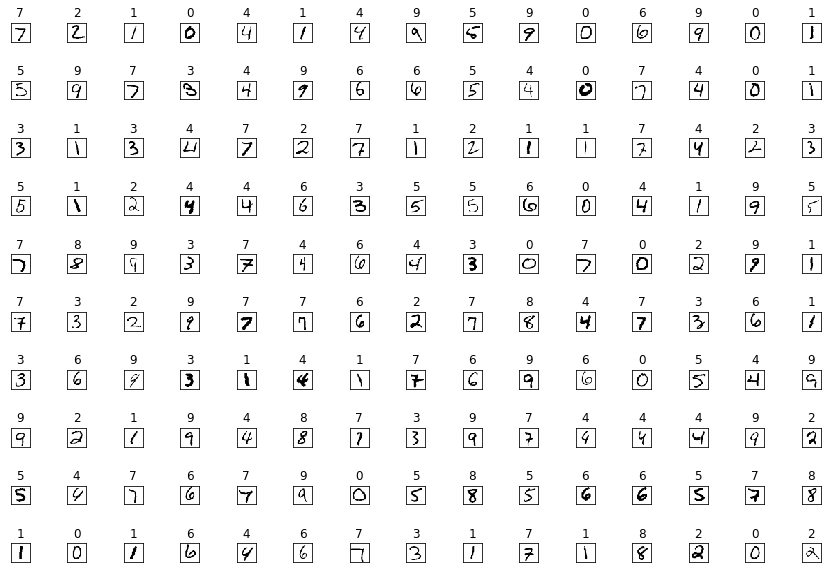

In [167]:
f1 = plt.figure(1)

for i in range(150):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))
    plt.subplots_adjust(right = 2,  top=2,wspace=2, hspace=2)
    plt.subplot(10, 15, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# plot the average image of all the images for each digit

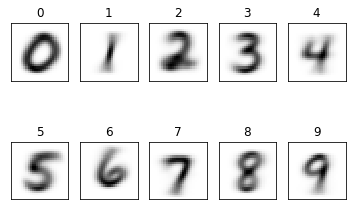

In [168]:
f2 = plt.figure(count+1)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)

for i in range(num_image):

    im_average[:, list_label[i]] += list_image[:, i]
    im_count[list_label[i]] += 1

for i in range(10):

    im_average[:, i] /= im_count[i]
    
    plt.subplot(2, 5, i+1)
    plt.title(i)
    plt.imshow(im_average[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

# define function of computing distance of pair of images

In [169]:
def computeDistance(img1, img2):
    d = (img1-img2)**2
    s = np.sum(d)
    return s

# define function of initialising label

In [170]:
def initialiseLabel(k):
    initLabel = np.zeros(num_image, dtype=int)
    for i in range(num_image):
        initLabel[i] = np.random.randint(0, k)
    return initLabel

# define function of computing centroid

In [172]:
def computeCentroid(assignedLabel):
    k = len(assignedLabel)
    centroid = np.zeros((size_row * size_col, k), dtype=float)
    count = np.zeros(k, dtype=int)
    for i in range(num_image):
        centroid[:, assignedLabel[i]] += list_image[:, i]
        count[assignedLabel[i]] += 1
    for i in range(k):
        centroid[:, i] /= count[i]
    return centroid

# define function of plotting initial centroid images

In [222]:
def plotCentroid(k, centroid,centroidLabel, title):
    for i in range(k):

        plt.subplot(2, k/2, i+1)
        plt.title(centroidLabel[i])
        plt.imshow(centroid[:,i].reshape((size_row, size_col)), cmap='Greys', interpolation='None') 

        frame   = plt.gca()
        frame.axes.get_xaxis().set_visible(False)
        frame.axes.get_yaxis().set_visible(False)
    plt.suptitle(title)
    plt.show()
    

# define function of assign images' label

In [175]:
def assignLabel(k, assignedLabel, centroid):
    for i in range(num_image):
        min_label = 0
        min_distance = computeDistance(list_image[:,i], centroid[:,0])
        for j in range(1, k):
            current_distance = computeDistance(list_image[:,i],centroid[:,j])
            if current_distance<min_distance:
                min_distance = current_distance
                min_label = j
        assignedLabel[i] = min_label

# define function of assign cluster's label

In [176]:
def assignClusterLabel(k, assignedLabel):
    assLabel = np.zeros((k,10), dtype=int)
    newLabel = np.zeros(k, dtype=int)
    for i in range(num_image):
        assLabel[assignedLabel[i]][list_label[i]] += 1
    for i in range(k):
        newLabel[i] = np.argmax(assLabel[i,:])
    return newLabel

# define funtion of computing energy for defined label

In [178]:
def computeEnergy(assignedLabel, centroid):
    energy = 0
    for i in range(num_image):
        energy += computeDistance(list_image[:,i], centroid[:,assignedLabel[i]])
    energy /= num_image
    return energy

# define function of computing accuracy for clusters

In [240]:
def computeAccuracy(k, assignedLabel, clusterLabel):
    countCorrect = np.zeros(k, dtype = int)
    count = np.zeros(k, dtype = int)
    accuracy = 0
    for j in range(num_image):
        count[assignedLabel[j]] += 1
        if clusterLabel[assignedLabel[j]] == list_label[j]:
            countCorrect[assignedLabel[j]] += 1
    for i in range(k):
        accuracy += (countCorrect[i]/count[i])
    return (accuracy/k)

# define function of k-means algorithms for MNIST

In [223]:
def k_meansForMnist(k):
    assigned_label = initialiseLabel(k)
    
    energy = sys.maxsize
    accuracy = 0
    centroid = computeCentroid(assigned_label)
    cluster_label = assignClusterLabel(k, assigned_label)
    plotCentroid(k, centroid,cluster_label, "initial Centroid")
    iteration = 0
    
    while energy > computeEnergy(assigned_label, centroid):
        energy = computeEnergy(assigned_label, centroid)
        assignLabel(k, assigned_label,centroid)
        cluster_label = assignClusterLabel(k, assigned_label)
        centroid = computeCentroid(assigned_label)
        accuracy = computeAccuracy(k, assigned_label, cluster_label)
        plt.subplot(1,2,1)
        plt.title("energy")
        plt.scatter(iteration, energy, c = 'r')
        plt.subplot(1,2,2)
        plt.title("accuracy")
        plt.scatter(iteration, accuracy, c = 'b')
        iteration += 1
    plt.show()
    plotCentroid(k, centroid,cluster_label, "final Centroid")
    return energy, accuracy

# compute k-means algorithm for varying k

# define array for saving energy and accuracy of specific k

In [241]:
k_energy_accuracy = []

## 1. k = 4

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


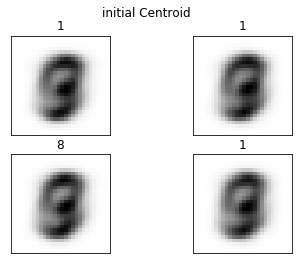

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


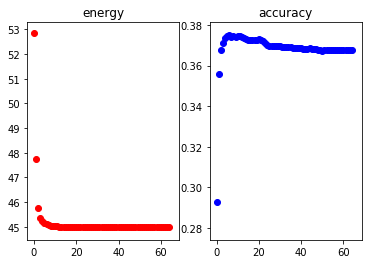

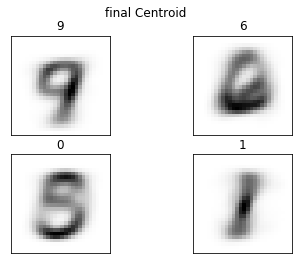

In [242]:
k = 4
k_energy, k_accuracy = k_meansForMnist(k)
k_energy_accuracy.append(np.array([k, k_energy, k_accuracy]))

## 2. k = 6

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


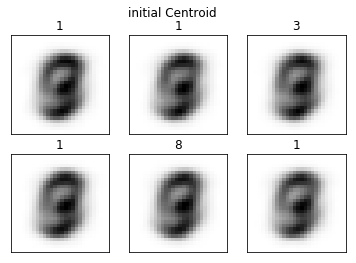

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


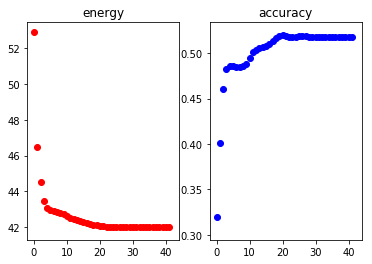

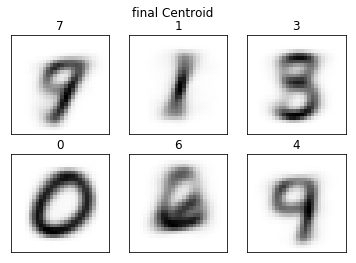

In [243]:
k = 6
k_energy, k_accuracy = k_meansForMnist(k)
k_energy_accuracy.append(np.array([k, k_energy, k_accuracy]))

## 3. k = 10

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


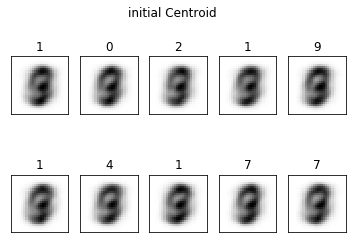

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


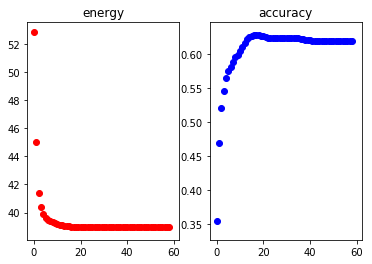

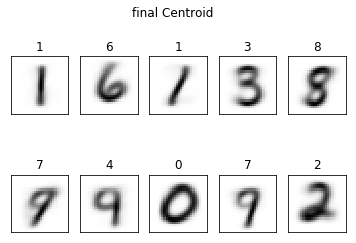

In [244]:
k = 10
k_energy, k_accuracy = k_meansForMnist(k)
k_energy_accuracy.append(np.array([k, k_energy, k_accuracy]))

## 4. k = 16

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


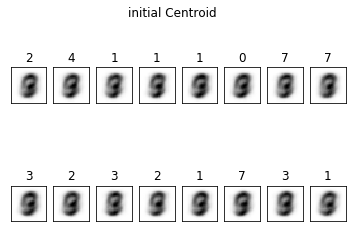

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


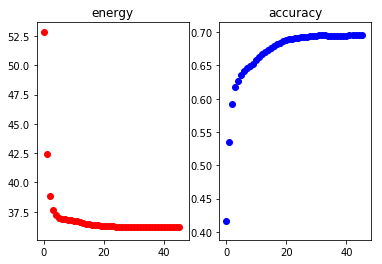

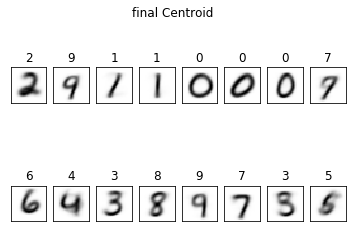

In [245]:
k = 16
k_energy, k_accuracy = k_meansForMnist(k)
k_energy_accuracy.append(np.array([k, k_energy, k_accuracy]))

## 5. k = 20

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


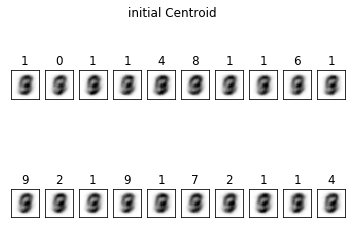

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


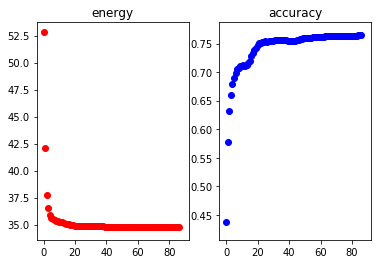

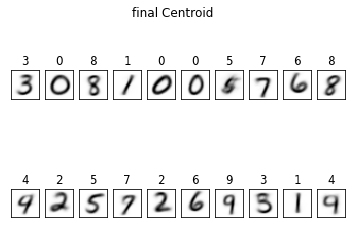

In [246]:
k = 20
k_energy, k_accuracy = k_meansForMnist(k)
k_energy_accuracy.append(np.array([k, k_energy, k_accuracy]))

## 6. k = 30

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


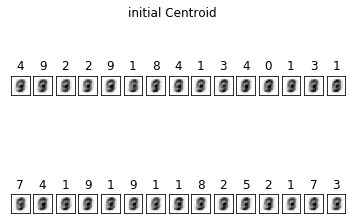

c:\users\주은미\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


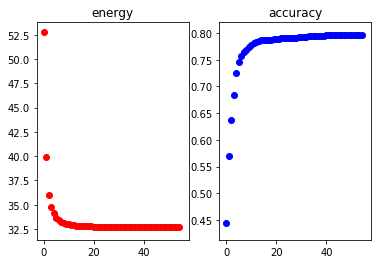

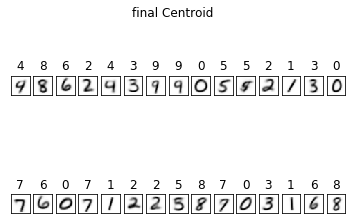

In [247]:
k = 30
k_energy, k_accuracy = k_meansForMnist(k)
k_energy_accuracy.append(np.array([k, k_energy, k_accuracy]))

In [270]:
k_energy_accuracy = np.array(k_energy_accuracy, dtype = float)

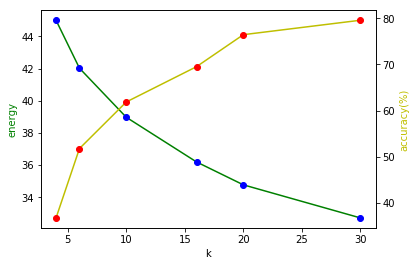

In [271]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.set_xlabel('k')
ax1.plot(k_energy_accuracy[:,0], k_energy_accuracy[:,1], 'g')
ax1.plot(k_energy_accuracy[:,0], k_energy_accuracy[:,1], 'bo')
ax1.set_ylabel('energy', color = 'g')

ax2 = ax1.twinx()
ax2.plot(k_energy_accuracy[:,0], k_energy_accuracy[:,2], 'y')
ax2.plot(k_energy_accuracy[:,0], k_energy_accuracy[:,2], 'ro')
ax2.set_ylabel('accuracy(%)', color='y')

plt.show()

# for k-means algorithm in MNIST

# with larger k then smaller finial energy and larger final accuracy 

# but required more time for calculation